<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# Fluid statics
In this notebook, we will learn
* About the specific weight of a fluid and how pressure increases with depth
* The concept of a fluid interface and a free surface
* How to perform basic calculations

### Set up the module

In [1]:
using FluidDynTools

In [2]:
using Plots

Fluid statics basically involves fluids that are not in motion (although we'll generalize
this later) It is described by a basic equation that governs the pressure,

$$\dfrac{\mathrm{d}p}{\mathrm{d}z} = -\rho g$$

where $\rho$ is the density of the fluid, $g$ is gravity, and $z$ is a coordinate
pointing vertically upward (i.e., $g$ is pointing in the $-z$ direction). The grouping
$\rho g$ is called the *specific weight* of the fluid, and is usually given the symbol
$\gamma$.

For example, for water, compare

In [3]:
ρg = Density(Water)*Gravity()

9796.84335 kg m⁻² s⁻²

with

In [4]:
γ = SpecificWeight(Water)

SpecificWeight = 9796.84335 N m⁻³

This equation shows us that pressure increases with depth, in the direction of gravity.
However, it is important to understand that it only tells us about *differences*
of pressure, not absolute pressure:

$$p_2 - p_1 = -\gamma (z_2 - z_2)$$

Notice that it doesn't matter how wide the fluid is. It could be in the ocean
or in a small tube. Only depth matters, since it is the weight of fluid *per unit
area* above a certain position that contributes to the pressure.

To give an example of how we use this, let's first define the concept of a *free
surface*: the interface between a liquid and a gas. The most obvious example of
this is where liquid and air meet, like at the surface of the ocean or
in a bath of water. Gases are much less dense than liquids at standard conditions,
so they have much smaller specific weights.

In [5]:
SpecificWeight(Air)

SpecificWeight = 12.01535944185574 N m⁻³

This means that the pressure
variations in a static gas are much smaller than in a static liquid. As a result, it is safe to assume that (absolute) pressure in the gas is uniform, and
equal to some ambient value. For example, in air, we often assume it is 1 atm.
We often use the symbol $p_\infty$ for this ambient pressure:

In [6]:
p∞ = Pressure(1u"atm")

Pressure = 101325.0 Pa

We can obtain specific weights in liquids other than water by knowing their
*specific gravity*, equal to their specific weight divided by that of water.
For example, if a certain type of oil has specific gravity of 0.9, it means its
density is 0.9 times that of water:

In [7]:
γoil = SpecificWeight(SpecificGravity(0.9))

SpecificWeight = 8817.159015 N m⁻³

So let's get an appreciation for how much the pressure increases in water due to fluid
statics. For example, in 1 m of water, the pressure increases by

In [8]:
dp = Pressure(SpecificWeight(Water)*1u"m")

Pressure = 9796.84335 Pa

How much is this increase in atmospheres?

In [9]:
value(dp,u"atm")

0.09668732642487046 atm

so for every meter of depth, the pressure increases by 10 percent of one
atmosphere. This means we only need to go down to 10 meters (or 34 feet)
to increase the pressure by one atmosphere. That's not far at all.

We can plot the pressure distribution through this depth by using `staticpressure`

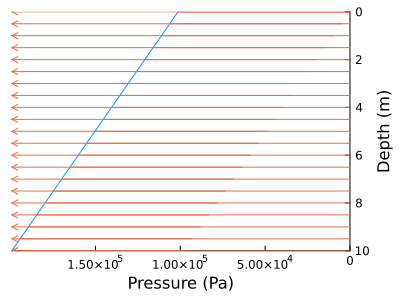

In [10]:
staticpressure(10u"m",Water)

Because the fluid statics equation describes pressure differences, then it can be
used in a *cumulative* manner. In other words, to calculate the pressure at some
point, we add the contributions of all of the fluid (or fluids) above that point.

For example, to emphasize how little the pressure in air varies with depth,
let's imagine there is a 10 m layer of air on top of the 10 m layer of water,
and plot the pressure distribution throughout both layers. The top of the air
layer is at 1 atm. (Here, we are imagining both fluids sitting inside a container,
so a layer of air makes sense.)

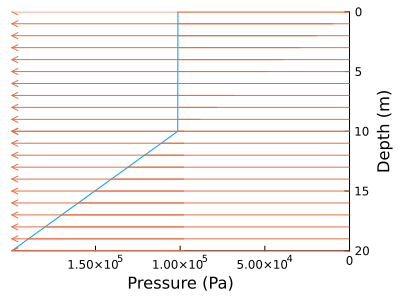

In [11]:
staticpressure([10u"m",20u"m"],[Air,Water])

There's no noticeable change of pressure in the upper (air) layer, so we
can always assume that the pressure is uniform in static air. But the pressure in
the water increases much more rapidly with depth.

### Example
A 10-foot layer of glycerin lies below a 5-ft layer of water. The water is exposed
to pressurized air at $p_\infty = 3$ atm. Determine the pressure at the bottom of the glycerin
layer, in Pa.

We simply add the contributions in each layer, and the answer will be

$p = p_\infty + \gamma_w h_w + \gamma_g h_g$

where $\gamma_w$ is the specific weight of water, $h_g$ is the height of the
water layer, $\gamma_g$ the specific weight of glycerin, and $h_g$ the
height of this layer. As usual, we need to make sure that the units are consistent
with each other when we perform this calculation. For example, to get
the height of the water layer in meters,

In [12]:
h_w = Height(5u"ft")

Height = 1.524 m

But actually the tools in our notebooks do this all for us:

In [13]:
Pressure(3u"atm" + SpecificWeight(Water)*5u"ft" + SpecificWeight(Glycerin)*10u"ft")

Pressure = 356567.63245740003 Pa

We can plot the pressure in these layers:

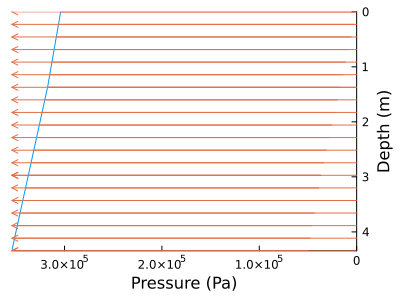

In [14]:
staticpressure([5u"ft",5u"ft"+10u"ft"],[Water,Glycerin],ambient=3u"atm")

Glycerin is only slightly denser than water, so it doesn't look remarkably
different in the two layers.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*